# Gaussian Naive Baye's from Scratch

Hello everyone. In this tutorial, we will see how to use Gaussian Naive Baye's Algorithm for a Bank Note Authentication Problem and see how well it classifies the Bank Notes as original or fake.

Naive Bayes itself is a very simple and useful algorithm, but it has its variants that sometimes perform much better than the basic version of Naive Baye's Algorithm. The widely used variants of Naive Baye's are:

1. Gaussian Naive Bayes

2. Multinomial Naive Bayes

3. Bernoulli Naive Bayes

In this tutorial, I'll be using Gaussian Naive Bayes but feel free to use this code with other classifiers and see the difference in performance.

## Theory:

We saw in the last post the working of the Naive Bayes algorithm from scratch. We saw that to obtain the probability of a classification result to be true or false, we need to calculate three things:

1. Prior Probability [P(H)]

2. Likelihood Probability [P(E|H)]

3. Priori Probability [P(E)]

In the basic version, we calculated the Likelihood Probability using the formula:

##### sum(count(E = Y| H = Y)) / sum(count(H = Y))

When using Gaussian Naive Bayes, it assumes that the values of the features are continuous and are usually normally distributed i.e. they have a Gaussian Distribution. The Likelihood for each feature is then represented by the formula:

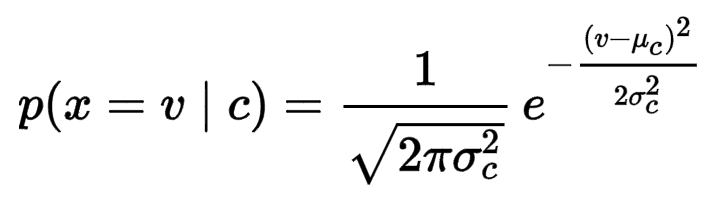

In [7]:
from IPython.display import Image
%matplotlib inline

Image(filename= 'C:/PythonProjects/NaiveBayes/gaussian.png', width='600',height='800')

Let's take an example dataset and see how this formula fits in. This dataset is from Wikipedia.

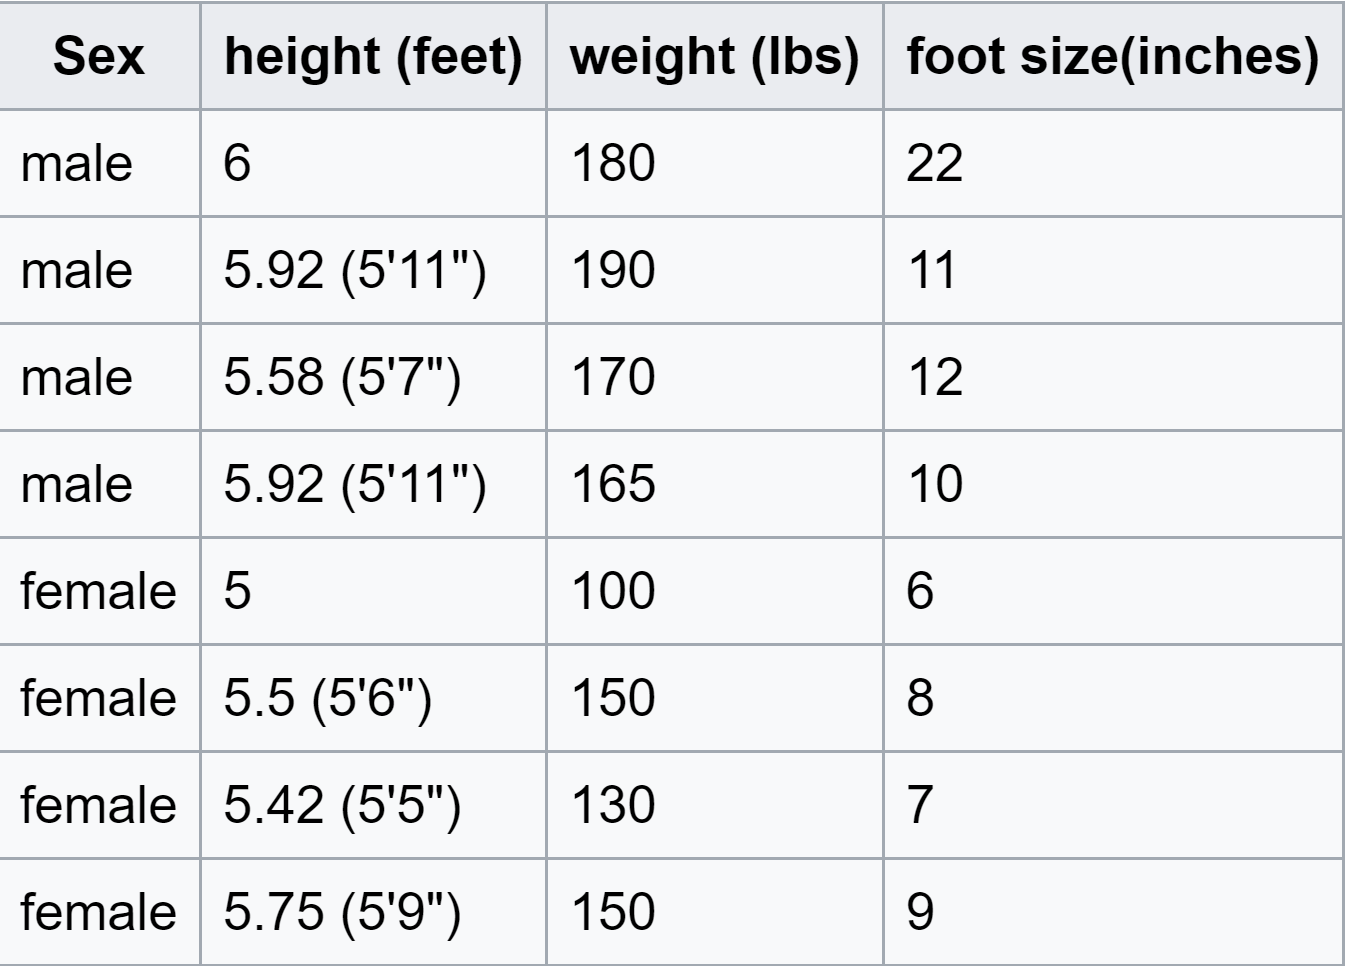

In [4]:
Image(filename= 'C:/PythonProjects/NaiveBayes/wiki-example.png',width='500',height='500')

So, if we were to apply the above formula for each feature to this dataset, the equation would look like this for one of the features...

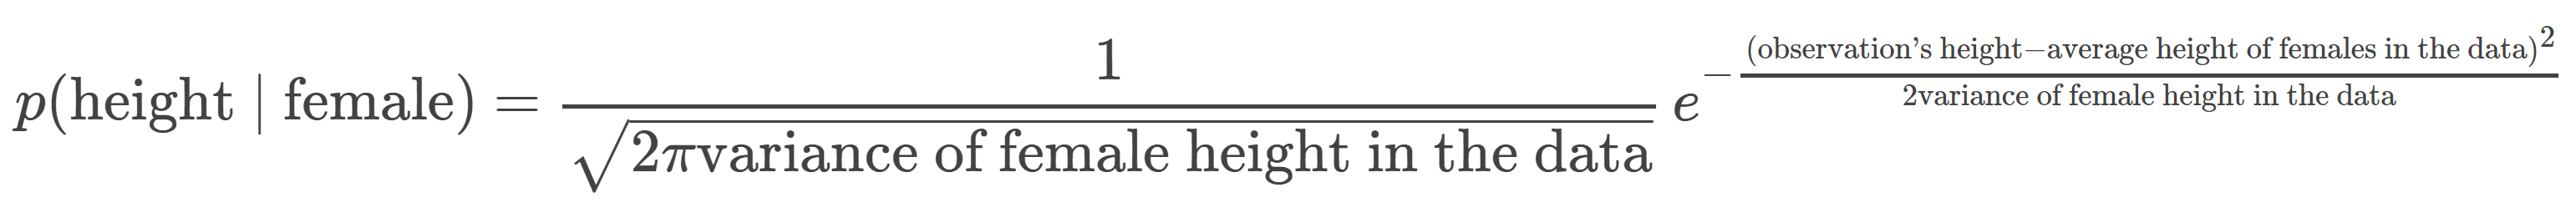

In [10]:
Image(filename= 'C:/PythonProjects/NaiveBayes/gaussianlikelihood.png',width='',height='1200')

and similarly for the rest of the features. So, this means that while using Gaussian NB algorithm, we need to calculate the Mean and the Variance for each class and feature in the data.

So, let's get back to work. In this tutorial, we'll be doing a Bank Note Authentication using Gaussain Naive Bayes Algorithm and find out the probability that if a Bank Note is Original one or a Fake. So, Let's get started.

You can download the dataset for this tutorial from here [https://archive.ics.uci.edu/ml/datasets/banknote+authentication]

### Step-1: Import Dependencies

The first step as usual is to import the dependencies. For this code, we require two libraries:

1. **Numpy**:  for numerical computations

2. **Pandas**:  for data analysis

In [11]:
# Import Dependencies
import numpy as np
import pandas as pd

### Step-2: Import Dataset

As I mentioned earlier, for this tutorial, we'll be using the Bank Note Authentication dataset. So, let's import it.

In [19]:
# Import Dataset
df = pd.read_csv('dataset/data_banknote_authentication.csv')

# Have a look at the dataset
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


Currently it does not have any column name for features. So, let's add it. This dataset has the following features:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

### Step-3: Data Preprocessing

In [20]:
# Adding names to Columns
df.columns = ['variance','skewness','curtosis','entropy','class']

df.head()

,variance,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [21]:
# Describe the Data
df.describe()

,variance,skewness,curtosis,entropy,class
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,0.431410,1.917434,1.400694,-1.192200,0.444931
std,2.842494,5.868359,4.310105,2.101683,0.497139
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.774700,-1.711300,-1.553350,-2.417000,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.814650,6.813100,3.181600,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


So, the dataset has a total of 1371 data points and no missing data points.

### Step-4: Calculating Probabilities 

In [22]:
# Count the number of Original and Fake Notes
# Original: Class = 1
# Fake: Class = 0

num_classOriginal = df['class'][df['class'] == 1].count()
num_classFake = df['class'][df['class'] == 0].count()
total = len(df)

print('Number of Original Bank Notes: ',num_classOriginal)
print('Number of Fake Bank Notes: ',num_classFake)
print('Total number of Notes: ',total)

Number of Original Bank Notes:  610
Number of Fake Bank Notes:  761
Total number of Notes:  1371


Now that we know the total number of original and Fake notes, we can now find out the probability of fake and original notes.

In [24]:
# Calculating the Prior Probabilities

# Probability(Original Note)
Probb_Original = num_classOriginal/total
print('Probability of Original Notes in Dataset: ',Probb_Original)

# Probability(Fake Note)
Probb_Fake = num_classFake/total
print('Probability of Fake Notes in Dataset: ',Probb_Fake)

Probability of Original Notes in Dataset:  0.444930707513
Probability of Fake Notes in Dataset:  0.555069292487


As we discussed in the above section that we need to calculate the Mean and the Variance for each class and feature in the data. So, let's do that using pandas.

In [26]:
# Data Mean
data_mean = df.groupby('class').mean()
print('Mean: \n',data_mean)

print('\n')

# Data Variance
data_variance = df.groupby('class').var()
print('Variance: \n',data_variance)

Mean: 
        variance  skewness  curtosis   entropy
class                                        
0      2.274919  4.250833  0.801454 -1.148561
1     -1.868443 -0.993576  2.148271 -1.246641


Variance: 
        variance   skewness   curtosis   entropy
class                                          
0      4.080749  26.416313  10.493610  4.521247
1      3.538848  29.212768  27.686654  4.288974


So, doing this, we get the Mean and the Variance for each feature in each class of the given dataset. Now that we have got all the values that we require to find out the probability, let's define our function that we discussed in the begenning where we enter the Mean and the Variance values to find out the Likelihood Probability.

In [27]:
# Function to Calculate Likelihood Probability
def p_x_given_y(x, mean_y, variance_y):
    probb = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    return probb

So, now that we have defined our all functions, it's time to put in the values and calculate the probability if our Note is Original or a Fake. But wait, we haven't defined our test data yet. Let's do that first.

In [32]:
# Testing Data
# Originally, this data represents Fake Bank Note
a = [3.2032,5.7588,-0.75345,-0.61251]

So, now finally we can calculate the Probability of the note with the features in "a" as an Original or a Fake Note.

In [33]:
# Probability the Notes are Original
prob_orig = [Probb_Original * p_x_given_y(a[0], data_mean['variance'][1], data_variance['variance'][1]) * p_x_given_y(a[1], data_mean['skewness'][1], data_variance['skewness'][1]) * p_x_given_y(a[2], data_mean['curtosis'][1], data_variance['curtosis'][1]) * p_x_given_y(a[3], data_mean['entropy'][1], data_variance['entropy'][1])]

# Probability the Notes are Fake
prob_fake = [Probb_Fake * p_x_given_y(a[0], data_mean['variance'][0], data_variance['variance'][0]) * p_x_given_y(a[1], data_mean['skewness'][0], data_variance['skewness'][0]) * p_x_given_y(a[2], data_mean['curtosis'][1], data_variance['curtosis'][0]) * p_x_given_y(a[3], data_mean['entropy'][0], data_variance['entropy'][0])]

So, now that we have defined the probabilities, let's see the result.

In [34]:
# Testing the Classifier
if (prob_orig > prob_fake):
    print('Congratulations !! Your Bank Note is Original...')
else:
    print('Sorry !! Your Bank Note is a Fake !!')

Sorry !! Your Bank Note is a Fake !!


#### Thanks everyone for going through this tutorial. Please leave your valuable suggestions, comments, feedbacks etc. below in the comments section.